In [173]:
import pandas as pd
from Exponential import ExponentialAFTFitter
import matplotlib.pyplot as plt
from clv_calc import calculate_clv

from lifelines import WeibullFitter, LogNormalFitter, LogLogisticFitter, KaplanMeierFitter
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, ExponentialFitter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [174]:
telco = pd.read_csv("telco.csv")

In [175]:
print(telco.columns)


Index(['ID', 'region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn'],
      dtype='object')


In [176]:
cols = ['region', 'marital', 'ed', 'gender', 'retire', 'voice', 'internet', 'forward', 'custcat', 'churn']

df = pd.get_dummies(telco, columns=cols, prefix=cols, drop_first=False)[[
    'tenure', 'age', 'income', 
    'region_Zone 2', 'region_Zone 3',
    'marital_Married', 'churn_Yes',
    'ed_Did not complete high school', 'ed_High school degree',
    'ed_Post-undergraduate degree', 'ed_Some college',
    'voice_Yes', 'retire_Yes', 'gender_Male',
    'internet_Yes', 'forward_Yes',
    'custcat_E-service', 'custcat_Plus service', 'custcat_Total service'
]]

# Display information about the DataFrame
print("DataFrame Information:")
print(df.info())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   tenure                           1000 non-null   int64
 1   age                              1000 non-null   int64
 2   income                           1000 non-null   int64
 3   region_Zone 2                    1000 non-null   bool 
 4   region_Zone 3                    1000 non-null   bool 
 5   marital_Married                  1000 non-null   bool 
 6   churn_Yes                        1000 non-null   bool 
 7   ed_Did not complete high school  1000 non-null   bool 
 8   ed_High school degree            1000 non-null   bool 
 9   ed_Post-undergraduate degree     1000 non-null   bool 
 10  ed_Some college                  1000 non-null   bool 
 11  voice_Yes                        1000 non-null   bool 
 12  retire_Yes                

In [177]:
weibull_model = WeibullAFTFitter()


# Fit the models to your data
weibull_model.fit(df, duration_col='tenure', event_col='churn_Yes')
wb_aft_pred = weibull_model.predict_survival_function(df).transpose()
wb_avg = wb_aft_pred.mean().to_list()
wb_aft_pred.head()


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.994328,0.987294,0.979671,0.971664,0.963378,0.954881,0.946219,0.937426,0.928530,0.919552,...,0.486450,0.479982,0.473584,0.467255,0.460994,0.454802,0.448678,0.442622,0.436633,0.430711
1,0.997371,0.994099,0.990540,0.986784,0.982881,0.978859,0.974739,0.970537,0.966263,0.961928,...,0.716402,0.711978,0.707570,0.703177,0.698801,0.694441,0.690097,0.685771,0.681461,0.677167
2,0.999428,0.998715,0.997937,0.997114,0.996255,0.995368,0.994457,0.993524,0.992571,0.991602,...,0.930101,0.928851,0.927598,0.926344,0.925088,0.923831,0.922573,0.921313,0.920051,0.918789
3,0.989950,0.977550,0.964189,0.950240,0.935900,0.921292,0.906505,0.891602,0.876633,0.861639,...,0.278163,0.271630,0.265234,0.258972,0.252843,0.246844,0.240973,0.235228,0.229606,0.224106
4,0.997110,0.993516,0.989607,0.985484,0.981200,0.976788,0.972270,0.967663,0.962981,0.958233,...,0.693099,0.688396,0.683712,0.679049,0.674405,0.669781,0.665178,0.660595,0.656033,0.651492


In [178]:
lognormal_model = LogNormalAFTFitter()
lognormal_model.fit(df, duration_col='tenure', event_col='churn_Yes')
lgn_pred = lognormal_model.predict_survival_function(df).transpose()
lgn_avg = lgn_pred.mean().to_list()
lgn_pred.head()


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999026,0.995132,0.988842,0.980868,0.971731,0.961797,0.951325,0.940503,0.929468,0.918320,...,0.512620,0.507971,0.503394,0.498886,0.494446,0.490072,0.485764,0.481519,0.477336,0.473215
1,0.999678,0.998129,0.995325,0.991486,0.986822,0.981510,0.975690,0.969471,0.962943,0.956175,...,0.635216,0.630827,0.626490,0.622203,0.617965,0.613777,0.609636,0.605543,0.601497,0.597496
2,0.999998,0.999983,0.999940,0.999861,0.999739,0.999572,0.999359,0.999100,0.998794,0.998443,...,0.944525,0.943208,0.941887,0.940562,0.939235,0.937904,0.936571,0.935236,0.933898,0.932557
3,0.996059,0.983986,0.967407,0.948561,0.928663,0.908399,0.888174,0.868226,0.848699,0.829678,...,0.341148,0.336883,0.332703,0.328608,0.324594,0.320659,0.316802,0.313019,0.309310,0.305671
4,0.999780,0.998660,0.996556,0.993599,0.989940,0.985707,0.981010,0.975936,0.970558,0.964936,...,0.673235,0.669019,0.664848,0.660721,0.656637,0.652596,0.648596,0.644638,0.640720,0.636843


In [179]:
loglogistic_model = LogLogisticAFTFitter()
loglogistic_model.fit(df, duration_col='tenure', event_col='churn_Yes')
lglg_pred = loglogistic_model.predict_survival_function(df).transpose()
lglg_avg = lglg_pred.mean().to_list()
lglg_pred.head()


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.996508,0.990963,0.984294,0.976817,0.968720,0.960128,0.951140,0.941829,0.932259,0.922480,...,0.484212,0.478786,0.473450,0.468201,0.463038,0.457960,0.452964,0.448049,0.443213,0.438456
1,0.998246,0.995448,0.992061,0.988238,0.984065,0.979599,0.974886,0.969957,0.964841,0.959562,...,0.651810,0.646862,0.641959,0.637103,0.632292,0.627526,0.622806,0.618130,0.613500,0.608914
2,0.999813,0.999514,0.999149,0.998735,0.998280,0.997789,0.997266,0.996715,0.996137,0.995535,...,0.946209,0.945093,0.943972,0.942847,0.941719,0.940586,0.939451,0.938311,0.937169,0.936023
3,0.992773,0.981406,0.967913,0.953011,0.937133,0.920578,0.903569,0.886278,0.868840,0.851367,...,0.311236,0.306597,0.302068,0.297645,0.293325,0.289106,0.284983,0.280955,0.277018,0.273169
4,0.998531,0.996187,0.993347,0.990136,0.986627,0.982867,0.978892,0.974730,0.970402,0.965928,...,0.691026,0.686367,0.681743,0.677155,0.672602,0.668084,0.663602,0.659156,0.654745,0.650369


In [180]:
exponential_model = ExponentialAFTFitter()
exponential_model.fit(df, duration_col='tenure', event_col='churn_Yes')
exponential_prd = exponential_model.predict_survival_function(df).transpose()
exponential_avg = exponential_prd.mean()
exponential_prd.head()


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.990385,0.980862,0.971431,0.962091,0.952840,0.943678,0.934605,0.925618,0.916718,0.907904,...,0.544066,0.538835,0.533654,0.528523,0.523441,0.518408,0.513424,0.508487,0.503598,0.498756
1,0.994858,0.989742,0.984653,0.979590,0.974553,0.969542,0.964557,0.959597,0.954663,0.949754,...,0.722686,0.718970,0.715273,0.711595,0.707936,0.704296,0.700675,0.697072,0.693487,0.689922
2,0.999323,0.998646,0.997969,0.997293,0.996617,0.995942,0.995268,0.994593,0.993920,0.993246,...,0.958206,0.957556,0.956908,0.956259,0.955612,0.954964,0.954317,0.953671,0.953025,0.952379
3,0.975730,0.952050,0.928944,0.906398,0.884400,0.862936,0.841993,0.821558,0.801619,0.782164,...,0.212705,0.207542,0.202505,0.197591,0.192795,0.188116,0.183551,0.179096,0.174749,0.170508
4,0.995482,0.990985,0.986508,0.982052,0.977615,0.973199,0.968802,0.964425,0.960068,0.955731,...,0.751822,0.748426,0.745045,0.741679,0.738328,0.734993,0.731672,0.728367,0.725077,0.721801


In [181]:
print("AIC:", weibull_model.AIC_, "BIC:", weibull_model.BIC_)
print("AIC:", lognormal_model.AIC_, "BIC:", lognormal_model.BIC_)
print("AIC:", loglogistic_model.AIC_, "BIC:", loglogistic_model.BIC_)
print("AIC:", exponential_model.AIC_, "BIC:", exponential_model.BIC_)

AIC: 2985.46633121742 BIC: 2961.2818417753842
AIC: 2975.4071826324234 BIC: 2951.222693190388
AIC: 2974.5946499279635 BIC: 2950.410160485928
AIC: 3033.682514099776 BIC: 3006.5902693787584


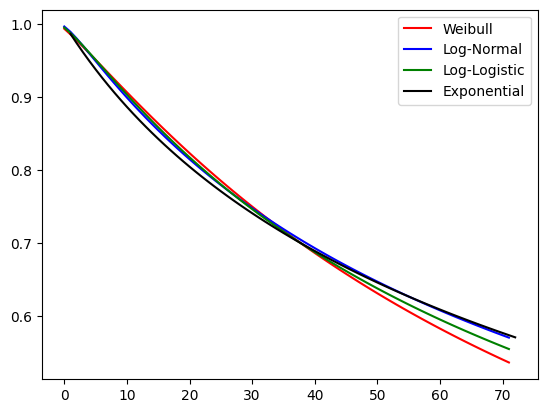

In [182]:
plt.plot(wb_avg, color = "red", label = "Weibull")
plt.plot(lgn_avg, color = "blue", label = "Log-Normal")
plt.plot(lglg_avg, color = 'green', label = 'Log-Logistic')
plt.plot(exponential_avg, color = 'black', label = 'Exponential')
plt.legend()
plt.show()

In [192]:
loglogistic_model.print_summary()


<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1468.30
         time fit was run = 2024-04-29 19:25:49 UTC

---
                                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                        
alpha_ age                              0.05      1.05      0.01            0.04            0.06                1.04                1.06
       custcat_E-service                1.10      2.99      0.17            0.77            1.42                2.16                4.15
       custcat_Plus service             0.89      2.43      0.21            0.47            1.30                1.61                3.67
       custcat_Total service            1.26      3.53      0.24            0.78            1.74                2.19                5.69
       ed_Did not complete high school  0.49      1.63      0.20            0.10            0.88                1.10                2.42
       ed_High school degree            0.36      1.44      0.16            0.06            0.67                1.06                1.95
       ed_Post-undergraduate degree     0.01      1.01      0.22           -0.42            0.44                0.66                1.55
       ed_Some college                  0.25      1.29      0.16           -0.05            0.56                0.95                1.76
       forward_Yes                     -0.15      0.86      0.17           -0.48            0.19                0.62                1.21
       gender_Male                      0.03      1.03      0.11           -0.19            0.24                0.82                1.28
       income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
       internet_Yes                    -0.83      0.44      0.14           -1.11           -0.55                0.33                0.58
       marital_Married                  0.42      1.52      0.11            0.20            0.64                1.22                1.90
       region_Zone 2                   -0.04      0.96      0.14           -0.31            0.23                0.74                1.26
       region_Zone 3                    0.12      1.13      0.14           -0.15            0.39                0.86                1.48
       retire_Yes                       0.01      1.01      0.48           -0.92            0.94                0.40                2.56
       voice_Yes                       -0.46      0.63      0.16           -0.78           -0.14                0.46                0.87
       Intercept                        1.53      4.64      0.28            0.99            2.07                2.70                7.96
beta_  Intercept                        0.32      1.38      0.05            0.22            0.42                1.25                1.53

                                        cmp to     z      p  -log2(p)
param  covariate                                                     
alpha_ age                                0.00  8.37 <0.005     53.97
       custcat_E-service                  0.00  6.56 <0.005     34.14
       custcat_Plus service               0.00  4.21 <0.005     15.27
       custcat_Total service              0.00  5.17 <0.005     22.05
       ed_Did not complete high school    0.00  2.44   0.01      6.08
       ed_High school degree              0.00  2.32   0.02      5.63
       ed_Post-undergraduate degree       0.00  0.04   0.97      0.05
       ed_Some college                    0.00  1.61   0.11      3.23
       forward_Yes                        0.00 -0.86   0.39      1.36
       gender

In [194]:
significant_features = loglogistic_model.summary[loglogistic_model.summary['p'] < 0.05].index
significant_features

MultiIndex([('alpha_',                             'age'),
            ('alpha_',               'custcat_E-service'),
            ('alpha_',            'custcat_Plus service'),
            ('alpha_',           'custcat_Total service'),
            ('alpha_', 'ed_Did not complete high school'),
            ('alpha_',           'ed_High school degree'),
            ('alpha_',                    'internet_Yes'),
            ('alpha_',                 'marital_Married'),
            ('alpha_',                       'voice_Yes'),
            ('alpha_',                       'Intercept'),
            ( 'beta_',                       'Intercept')],
           names=['param', 'covariate'])

In [195]:
final = df[['churn_Yes','tenure','age', 'marital_Married','internet_Yes','voice_Yes','ed_Did not complete high school','ed_High school degree',
              'custcat_E-service','custcat_Plus service','custcat_Total service' ]]

In [196]:
lglg_final = LogLogisticAFTFitter()
lglg_final.fit(final, duration_col='tenure', event_col='churn_Yes')
lglg_final_pd = lglg_final.predict_survival_function(final).transpose()
lglg_final.print_summary() 

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1471.96
         time fit was run = 2024-04-29 19:29:00 UTC

---
                                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                        
alpha_ age                              0.05      1.06      0.01            0.04            0.06                1.04                1.07
       custcat_E-service                1.09      2.96      0.17            0.76            1.41                2.14                4.11
       custcat_Plus service             0.79      2.21      0.17            0.46            1.13                1.59                3.09
       custcat_Total service            1.13      3.09      0.21            0.72            1.53                2.06                4.63
       ed_Did not complete high school  0.34      1.41      0.18           -0.02            0.70                0.98                2.02
       ed_High school degree            0.23      1.26      0.14           -0.04            0.50                0.96                1.65
       internet_Yes                    -0.85      0.43      0.14           -1.13           -0.57                0.32                0.56
       marital_Married                  0.40      1.49      0.11            0.18            0.62                1.20                1.86
       voice_Yes                       -0.45      0.64      0.16           -0.77           -0.13                0.46                0.88
       Intercept                        1.64      5.18      0.24            1.18            2.11                3.26                8.22
beta_  Intercept                        0.32      1.37      0.05            0.22            0.42                1.24                1.52

                                        cmp to     z      p  -log2(p)
param  covariate                                                     
alpha_ age                                0.00 10.41 <0.005     81.93
       custcat_E-service                  0.00  6.51 <0.005     33.62
       custcat_Plus service               0.00  4.67 <0.005     18.32
       custcat_Total service              0.00  5.46 <0.005     24.36
       ed_Did not complete high school    0.00  1.85   0.06      3.95
       ed_High school degree              0.00  1.67   0.10      3.38
       internet_Yes                       0.00 -5.98 <0.005     28.71
       marital_Married                    0.00  3.59 <0.005     11.58
       voice_Yes                          0.00 -2.76   0.01      7.45
       Intercept                          0.00  6.98 <0.005     38.29
beta_  Intercept                          0.00  6.16 <0.005     30.39
---
Concordance = 0.77
AIC = 2965.93
log-likelihood ratio test = 266.49 on 9 df
-log2(p) of ll-ratio test = 171.03

In [197]:
calculate_clv(lglg_final_pd, telco)
telco.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes,55880.791649
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes,57041.550904
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No,68363.329958
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes,42859.897679
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No,60641.516285


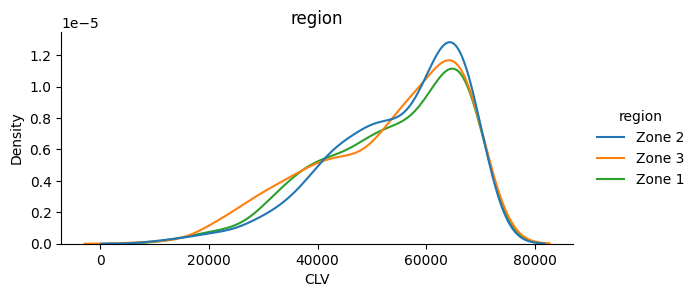

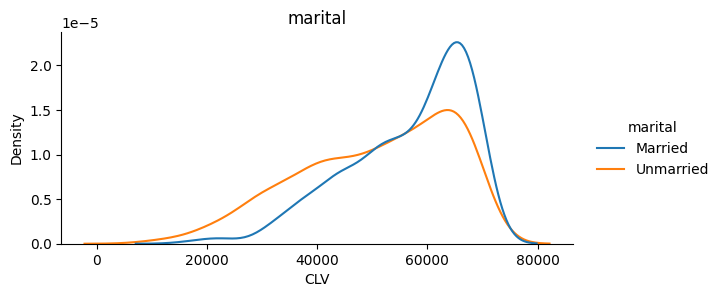

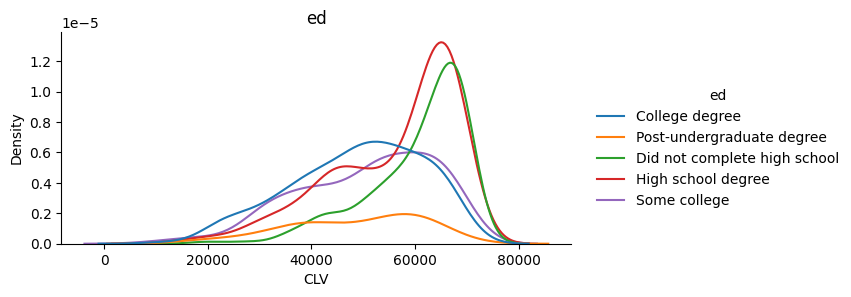

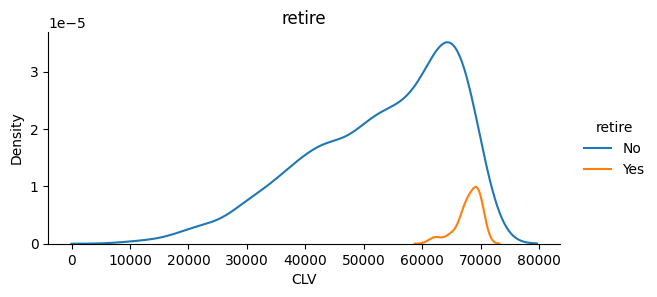

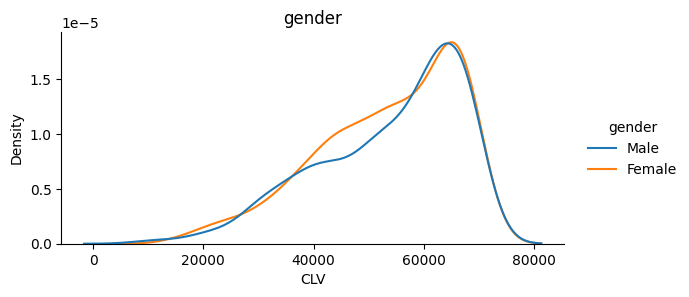

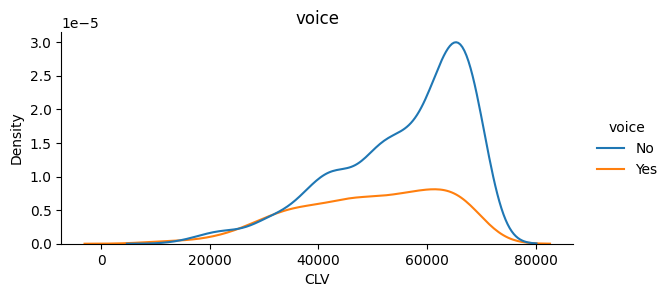

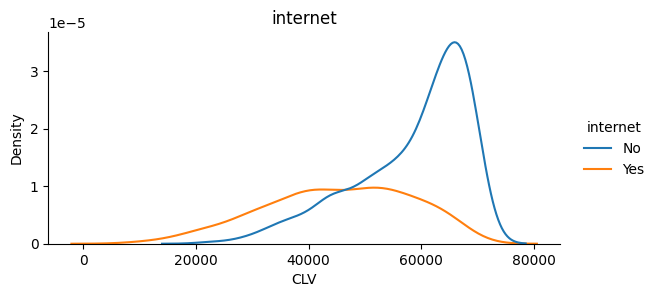

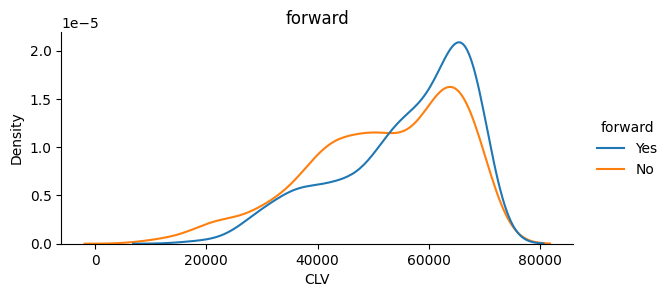

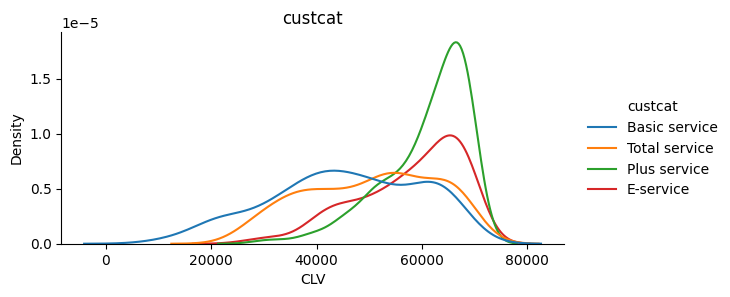

In [198]:
segments = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']
for column in segments:
    sns.displot(telco, kind='kde', x='CLV', hue=column, height = 3, aspect = 2)
    plt.title(column)

In [199]:
for col in segments:
    print(telco.groupby(col)[["CLV"]].mean())


                 CLV
region              
Zone 1  53536.764467
Zone 2  54464.744454
Zone 3  52922.324503
                    CLV
marital                
Married    56625.460965
Unmarried  50704.434173
                                       CLV
ed                                        
College degree                48767.499813
Did not complete high school  60482.458150
High school degree            56091.877183
Post-undergraduate degree     48322.639805
Some college                  50706.521712
                 CLV
retire              
No      52927.954734
Yes     67978.756891
                 CLV
gender              
Female  53442.179164
Male    53842.103121
                CLV
voice              
No     55444.669558
Yes    49492.935601
                   CLV
internet              
No        58490.278470
Yes       45297.517506
                  CLV
forward              
No       51732.754742
Yes      55591.958988
                        CLV
custcat                    
Basic service 

In [200]:
retained_customers = telco[telco['churn'] == 'Yes']
at_risk_subscribers = len(retained_customers)
#let's see on average CLV the retained customers can generate in their entire lifetime.
retained_clv = retained_customers['CLV'].mean()
retained_clv 

46480.87710521087

In [201]:
retention_rate = 0.85 

#assume we are prepared to pay 0.25 percent of the each customers CLV to retain them
cost_per_customer = retained_clv * 0.25

retention_budget = at_risk_subscribers * retention_rate * cost_per_customer
print(f'Yearly Retention Budget: {retention_budget}')

Yearly Retention Budget: 2706349.069450903
